# K-means Project

We will create 6 housing clusters based only on their 'latitude','longitude' and their 'medincome' column.

In [1]:
%pip install --upgrade pip
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 22.2
    Uninstalling pip-22.2:
      Successfully uninstalled pip-22.2
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 50.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 21.5 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 678.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 37.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 13.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 44.9 MB/s eta 0:00:0000:0100:01


In [5]:
import pandas as pd
import numpy as np
%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%pip install plotly
import plotly.express as px
%pip install folium
import folium
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df = df_raw[['MedInc','Latitude','Longitude']]
df

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [10]:
df.describe()

,MedInc,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000
mean,3.870671,35.631861,-119.569704
std,1.899822,2.135952,2.003532
min,0.499900,32.540000,-124.350000
25%,2.563400,33.930000,-121.800000
50%,3.534800,34.260000,-118.490000
75%,4.743250,37.710000,-118.010000
max,15.000100,41.950000,-114.310000


In [11]:
escalador=StandardScaler()
df_norm=escalador.fit_transform(df)
df_norm

array([[ 2.34476576,  1.05254828, -1.32783522],
       [ 2.33223796,  1.04318455, -1.32284391],
       [ 1.7826994 ,  1.03850269, -1.33282653],
       ...,
       [-1.14259331,  1.77823747, -0.8237132 ],
       [-1.05458292,  1.77823747, -0.87362627],
       [-0.78012947,  1.75014627, -0.83369581]])

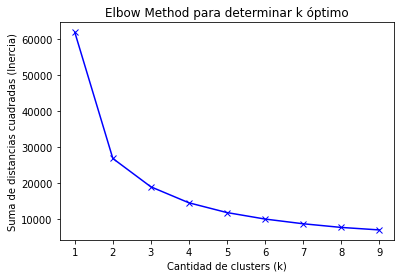

In [12]:
#cluster con mas cohesion -->metodo del codo y coef de silueta
#METODO DEL CODO
sum_distancias_cuadradas = []
#inercia calcula las distancias cuadradas

K = range(1,10)

for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    sum_distancias_cuadradas.append(kmeans.inertia_)
plt.plot(K,sum_distancias_cuadradas,'bx-')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Suma de distancias cuadradas (Inercia)')
plt.title('Elbow Method para determinar k óptimo')
plt.show()


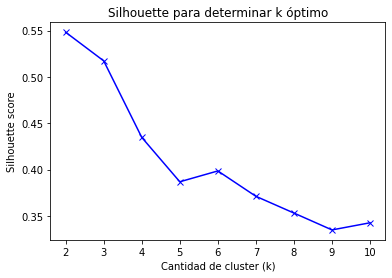

In [13]:
rango_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in rango_n_clusters:
# fit Kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_norm)
    cluster_labels = kmeans.labels_
# calcular silhouette
    silhouette_avg.append(silhouette_score(df_norm, cluster_labels))
plt.plot(rango_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Cantidad de cluster (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette para determinar k óptimo')
plt.show()

#nos quedamos con k=2 porque es es el score de silueta dio mas alto.

In [14]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_norm)

KMeans(n_clusters=2)

In [15]:
df2=escalador.inverse_transform(df_norm)

In [17]:
df2=pd.DataFrame(df2,columns=['MedInc','Latitude','Longitude'])

In [18]:
df2['Cluster'] = kmeans.labels_
df2

,MedInc,Latitude,Longitude,Cluster
0,8.3252,37.88,-122.23,0
1,8.3014,37.86,-122.22,0
2,7.2574,37.85,-122.24,0
3,5.6431,37.85,-122.25,0
4,3.8462,37.85,-122.25,0
...,...,...,...,...
20635,1.5603,39.48,-121.09,0
20636,2.5568,39.49,-121.21,0
20637,1.7000,39.43,-121.22,0
20638,1.8672,39.43,-121.32,0


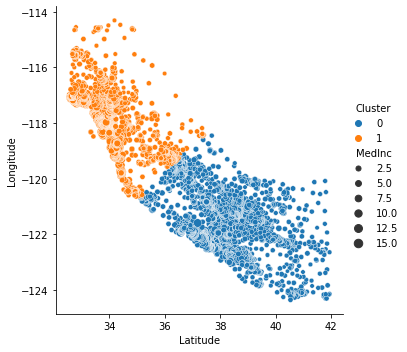

In [19]:
sns.relplot(x='Latitude', y='Longitude', data=df2, kind='scatter', size = 'MedInc',hue='Cluster')

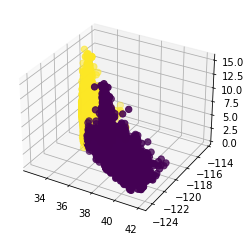

In [20]:
######## grafico 3D ##########

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(df2['Latitude'])
y = np.array(df2['Longitude'])
z = np.array(df2['MedInc'])

ax.scatter(x,y,z, c=df2["Cluster"], s=40)

plt.show()